# Data Visualization

Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Import Dataset

In [2]:
# Create path shortcut
path = r'C:\Users\kacee\OneDrive\Desktop\Instacart Basket Analysis'

In [3]:
# Import pkl orders_products_merged_groupby
df_ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_aggregated.pkl'))

Creating Bar Charts

<Axes: xlabel='orders_day_of_week'>

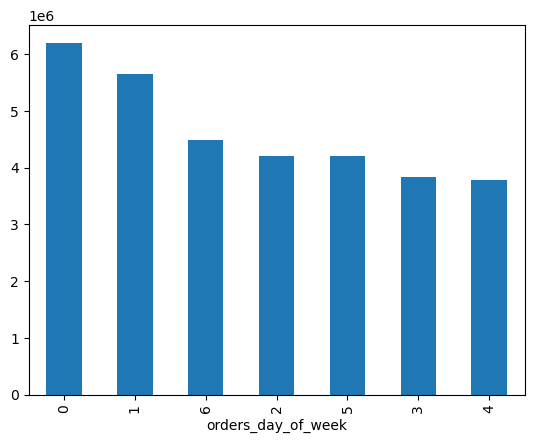

In [4]:
# Bar Chart with order_day_of_week for viewing
df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

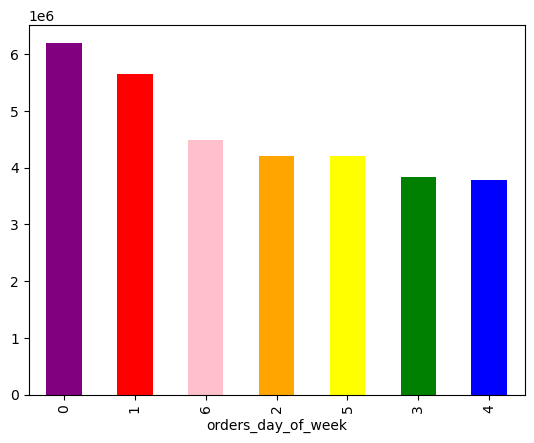

In [5]:
# Create a Bar Chart
bar = df_ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

Exporting Bar Chart

In [13]:
# Exporting bar.figure
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

Creating Histograms and Scatterplots

<Axes: ylabel='Frequency'>

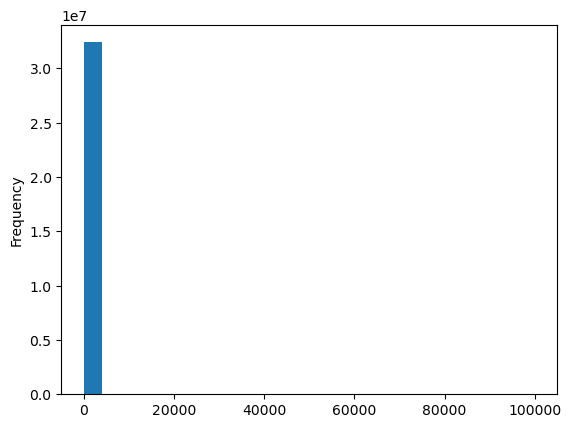

In [14]:
# Create Histogram of prices for viewing
df_ords_prods_merge['prices'].plot.hist(bins = 25)

In [15]:
# Check statistics for prices
df_ords_prods_merge['prices'].mean()

11.980225638383454

In [16]:
# Check statistics for prices
df_ords_prods_merge['prices'].median()

7.4

In [17]:
# Check statistics for prices
df_ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

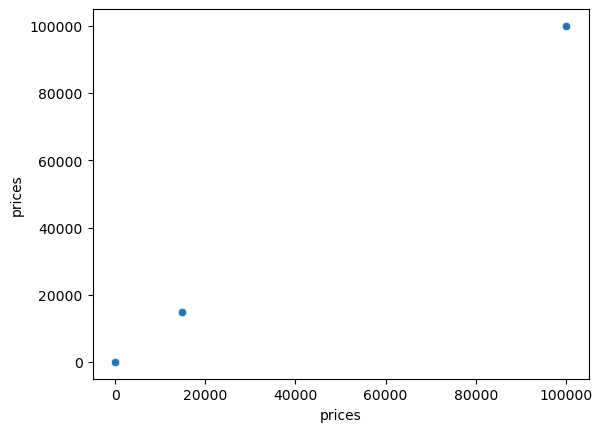

In [18]:
# Create scatterplot for prices
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merge)

In [19]:
# View outliers
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,High-range product,Busiest day,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [13]:
# Change outlier prices to Nan
df_ords_prods_merge.loc[df_ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [14]:
# Check statistics for prices
df_ords_prods_merge['prices'].max()

25.0

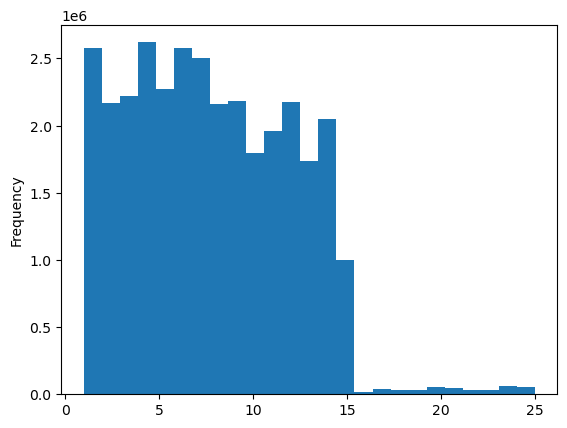

In [15]:
# Create Histogram of prices
hist = df_ords_prods_merge['prices'].plot.hist(bins = 25)

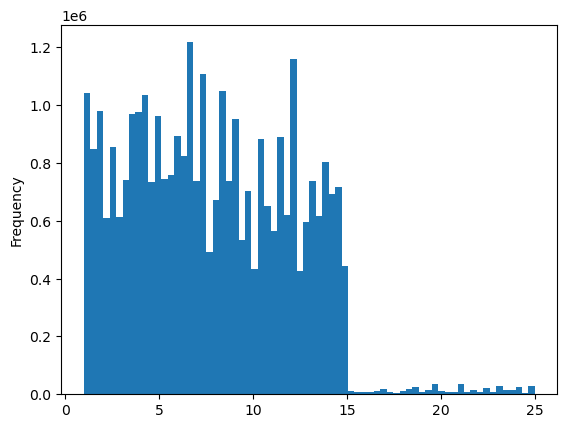

In [16]:
# Create Histogram of prices
hist2 = df_ords_prods_merge['prices'].plot.hist(bins = 70)

Exporting Histogram

In [17]:
# Exporting hist.figure
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_prices.png'))

Creating Subset for a Line Chart

In [18]:
# Create 2 million subset
df = df_ords_prods_merge[:2000000]

In [19]:
# Creating a 70/30 sample set
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_merge)) <= 0.7

In [20]:
# Split into 2 random sub sets (70/30)
big = df_ords_prods_merge[dev]
small = df_ords_prods_merge[~dev]

In [21]:
# Check numbers of datasets
len(df_ords_prods_merge)

32404859

In [22]:
# Check numbers of datasets
len(big) + len(small)

32404859

In [23]:
# Relevane columns only into df
df_2 = small[['orders_day_of_week','prices']]

Create Line Chart

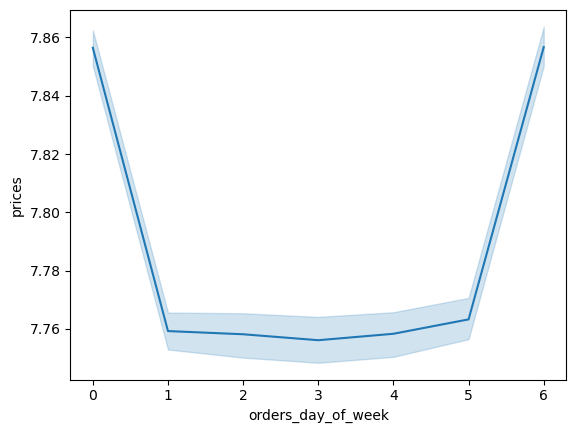

In [24]:
# Create Line Chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')